### Статистические критерии. ANOVA

In [34]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import *

#### Сгенерируем теоретическую генеральную совокупность

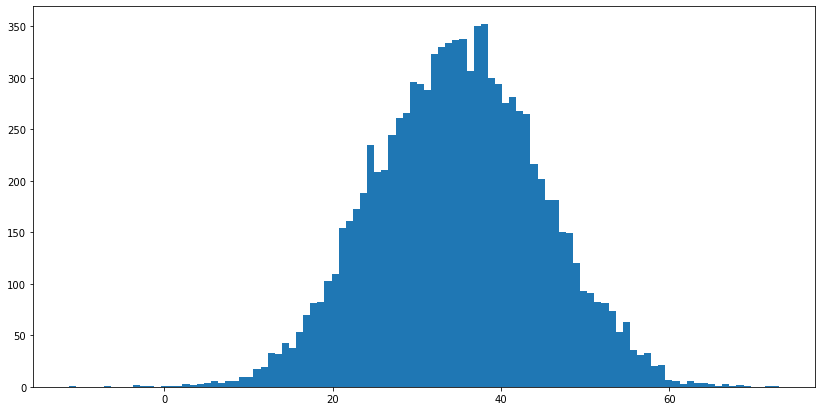

In [11]:
distrib = stats.norm(loc = 35, scale = 10)
gen_pop = distrib.rvs(size=10000)

fig = plt.figure(figsize=(14,7))
ax1 = plt.subplot(111)
plt.hist(gen_pop, 100)
plt.show()

#### Извлечём из совокупности 3 слуайные подгруппы по 50 заказов в каждой - пусть это будут наблюдения, полученный в реальном эксперименте

In [14]:
np.random.seed(3106)
sample_groups = []

for i in range(3):
    sample_groups.append(np.random.choice(gen_pop, size=50).astype(int))

sample_groups = np.array(sample_groups)
sample_groups

array([[36, 31, 18, 35, 38, 30, 32, 32, 22, 35, 16, 36, 36, 32, 37, 42,
        20, 38, 28, 44, 30, 55, 43, 44, 50, 41, 34, 32, 39, 36, 42, 24,
        17, 31, 45, 26, 51, 40, 46, 55, 51, 44, 37, 32, 20, 34, 33, 41,
        11, 18],
       [37, 37, 32, 41, 52, 42, 26, 34, 31, 32, 18, 29, 32, 41, 45, 32,
        24, 29, 39, 26, 23, 40, 32, 38, 49, 44, 36, 23, 42, 17, 29, 38,
        38, 51, 44, 23, 43, 37, 50, 40, 52, 52, 37, 34, 32, 30, 23, 38,
        37, 29],
       [48, 23, 32, 26, 28, 17, 27, 46, 17, 37, 38, 42, 33, 31, 16, 42,
        52, 37, 28, 45, 23, 39, 26, 17, 38, 44, 28, 21, 36, 22, 38, 31,
        22, 51, 30, 29, 43, 23, 28, 47, 19, 31, 27, 28, 28, 23, 37, 32,
        26, 38]])

#### Рассчитаем :
#### - среднее каждой выборки и стандартное отклонение (голубые линии на графике)
#### - среднее средних и стандартное отклонение средних (оранжевая линия на графике)

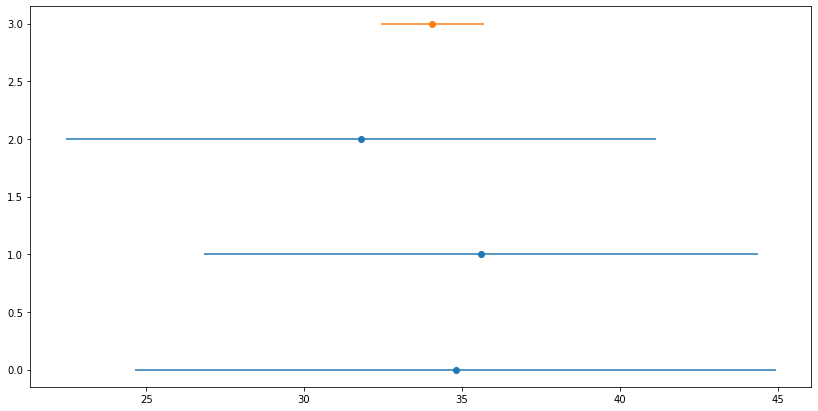

In [15]:
x = np.mean(sample_groups, axis=1)
y = np.arange(sample_groups.shape[0])
e = np.std(sample_groups, axis=1)

fig = plt.figure(figsize=(14,7))
plt.errorbar(x, y, xerr = e, linestyle='None', marker='o')
plt.errorbar(np.mean(x), y.shape[0], xerr = np.std(x), linestyle='None', marker='o')

plt.show()

#### 1) Формулируются гипотезы H0 и H1
###### H0 - выборки взяты из одного распределения (среднее всех выборок равны)
###### H1 - выборки взяты из разных распределний (хотя бы пара средних различается между собой)

#### 2) Фиксируется уровень значимости критерия значимости
###### Зададим alpha на уровне значимости 5%

#### 3) Выбирается статистический критерий для проверки гипотезы
###### Будем использовать ANOVA

#### 4) По выборочным данным вычисляется значение К-наблюдаемое по распределению выбранной статистики

In [22]:
num_of_groups = sample_groups.shape[0]
num_of_groups

3

In [17]:
# Рассчитаем среднее по всем наблюдениям

X_mean = sample_groups.mean()
X_mean

34.06666666666667

In [27]:
# Рассчитаем среднее для каждой группы

group_means = sample_groups.mean(axis=1)
group_means_reshaped = group_means.reshape(num_of_groups, 1)

In [28]:
# SSW - сумма средних квадратических отклонений
SSW = np.sum((sample_groups - group_means_reshaped)**2)
SSW

13374.0

In [29]:
# SSB - сумма отклонения групповых средних от средненего всей совокупности
group_lengths = [x.shape[0] for x in sample_groups]

SSB = np.sum((group_means - X_mean)**2 * group_lengths)
SSB

401.33333333333314

In [30]:
# F - критерий Фишер
m = num_of_groups
N = np.sum(group_lengths)

F = (SSB/(m-1)) / (SSW/(N-m))
F

2.205622850306564

In [31]:
# Воспользуемся пакетом stats для аналогичного расчета

F, p = stats.f_oneway(*sample_groups)

In [32]:
F

2.2056228503065647

#### 5) С учётом выбранного уровня значимости вычисляется критическая област и область принтия гипотезы, то есть находится К-критическое

In [35]:
# F-критическоее 
F_critical = scipy.stats.f.ppf(q=1-.05, dfn=m, dfd=N-m)
F_critical

2.6661487758521765

#### 6) Найденное значение К-наблюдаемое критерия сравнивается с К-критическое и по результатм сравнения делается вывод

In [36]:
F < F_critical

True

#### Вывод: Мы не можем отвергнуть гипотезу H0

In [38]:
p

0.11381548763928748

In [39]:
p > 0.05

True